<b>🙋‍♂️🙋‍♀️ Hi all !!! we going to implement heart failure classification problem ,If you like this notebook then plz consider a upvote for me and if don't plz drop your advise or comment so that i improve my skill !!!!!!!!

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:170%;text-align:center;border-radius:20px 80px;">📋 TABLE OF CONTENTS</p>   

    
* [1. Importing Libraries](#1)
    
* [2. Meta information of dataframe](#2)
    
* [3.Missing values and duplicated rows](#3)
    
* [4.Statistical information of Dataframe](#4) 

* [5.Visualize correlation of independent features and check multicolinarity problems](#5)
    
* [6. EDA & Visualization](#6)

    * [6.1. Numerical EDA](#6.1)
    
    * [6.2. Terget EDA](#6.2)
    
    * [6.3. Categorical EDA](#6.3)
        
* [6. Preprocess data for Machine Learning](#6)
    
* [7. 🏍Feature Engineering](#7)

    * [7.1.🏍Normalized skewed col](#7.1)
    
    * [7.2.🏍Normalized skewed col](#7.2)
       
    * [7.3. One-Hot Encoding](#7.3)
       
    * [7.4. Scaling Features](#7.4)
    

* [8. Create & Train Model](#8)

* [9. Models Score](#9)

* [10. Visualize Models Score](#10)

* [11. Plot Confusion Matrix for best 2 models](#11)










    

 <a id='top'></a>
 <div class="list-group" id="list-tab" role="tablist">
<h1 style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:170%;text-align:center;border-radius:20px 80px;">📋 Dataset information</h1>   

<b>DATA DICTONARY:------>>>

1 Age: Age of the patient [years]

2 Sex: Sex of the patient [M: Male, F: Female]

3 ChestPainType: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal 
Pain, ASY: Asymptomatic]

4 RestingBP: Resting blood pressure [mm Hg]

5 Cholesterol: Serum cholesterol [mm/dl]

6 FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7 RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8 MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]
9 ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]

10 Oldpeak: ST [Numeric value measured in depression]

11 ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12 HeartDisease: Output class [1: heart disease, 0: Normal]

Reference: https://www.kaggle.com/fedesoriano/heart-failure-prediction

# <a id="1"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">📥 Importing libraries</p>


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression,RidgeClassifier,LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix


import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)


sns.set(style="darkgrid")


In [2]:
#load the dataset
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<a id="2"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">📝 Meta information about Dataframe</p>
​

In [3]:
#check the rows and columns number.
print(f"number of rows:--> {df.shape[0]} and number of columns:--> {df.shape[1]}")

number of rows:--> 918 and number of columns:--> 12


In [4]:
#chack the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<a id="3"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">📝 Missing values and Duplicated rowa</p>
​

In [5]:
#check for missing numbers
def checking_m(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

,Missing_Number,Missing_Percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


<b>we have no  missing values in our dataset .great!!!

In [6]:
#check for dublicated rows
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 0


<b>no duplicated rows !!!

<a id="4"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">📈 Statistical information of Dataframe</p>


In [7]:
#check data description
df.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [8]:
#check the correlation between terget and each of columns
df.corr()["HeartDisease"]


Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

<a id="5"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">🎰 Visualize correlation of independent features and check multicolinarity problems</p>



<AxesSubplot:>

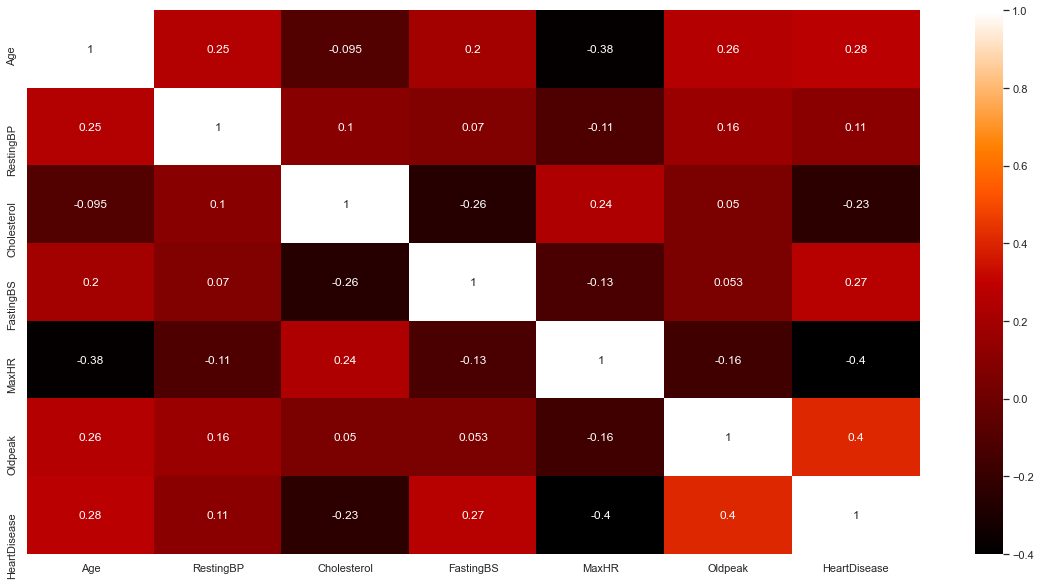

In [9]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="gist_heat")

In [10]:
#with the function we can select highly correlated  independent features 
#it will remove the first feature that is correlated with anything other feature 
def correlation(df,threshold):
    coll_corr=set() #set of all the names of correlated columns 
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] #getting the name of columns
                coll_corr.add(colname)
    return coll_corr           

In [11]:
#calling the fuction
corr_feature = correlation(df.iloc[:,:-1],0.85)
len(set(corr_feature))

0

<b> No highly correalted features or multicolinarity problems ,great !

<a id="6"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">🔥 EDA & Visualization</p>


<b> For our purpose we divided this part into 3 group:
    
1.Analysis the numerical col 🦄
       
2.Anaysis the categorical col 👾      
3.Analysis the terget col  🤡

In [12]:
#get numerical and categorical col
#getting the categorical and numerical columns from df
numeric_col=[col for col in df if df[col].dtype !="object" ]
categorical_col=[col for col in df if df[col].dtype=="object" ]
numeric_col.remove("HeartDisease")
print("Numerical col:",numeric_col)
print("Categrical col:",categorical_col)

Numerical col: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categrical col: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


<a id="6.1"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">👻 Numerical EDA</p>


In [13]:
df[numeric_col].iplot(kind='histogram',subplots=True)

<b>we noticed some skewed columns ,we fix it later !!!

In [14]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
fig = px.histogram(df, 'Age',             
                   color="HeartDisease",histfunc="count",
                   title="<b>Age vs HeartDisease</b>")

fig.show()

<b> 50 to 65 age peoples are suffer in herat disease 

In [16]:
fig = px.histogram(df, x='Cholesterol',        
                   color="HeartDisease",
                   title="<b>Cholesterol vsHeartDisease</b>")

fig.show()

In [17]:
fig = px.histogram(df, 'RestingBP',             
                   color="HeartDisease",histfunc="count",
                   title="<b>RestingBP vs HeartDisease</b>")

fig.show()

<a id="6.2"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">👻 Terget EDA</p>


In [18]:
pd.DataFrame(df['HeartDisease'].value_counts()).rename({"HeartDisease":"Counts"}, axis = 1).rename_axis("HeartDisease")

,Counts
HeartDisease,
1,508
0,410


In [19]:
fig = px.pie(df, names = "HeartDisease",
             title = "<b>Counts in HeartDisease</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 2)))


fig.show()

<b>No imbalanced classes in terget col ,great 😎😎

<a id="6.3"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">👻 Categorical EDA</p>


In [20]:
#Sex vs heart disease
df.groupby('Sex')['HeartDisease'].mean().sort_values(ascending=False)*100

Sex
M    63.172414
F    25.906736
Name: HeartDisease, dtype: float64

In [21]:
fig = px.histogram(data_frame = df,
             x = "Sex",
             color="HeartDisease", title="<b>Sex vs HeartDisease</b>",
             pattern_shape_sequence=['x'],template='plotly_dark', width=500,height=300)

fig.show()

<b> Oh no ,male suffer in heart disease at 2 time more than woman 😖

In [22]:
#ChestPainType vs Heart disease
df.groupby('ChestPainType')['HeartDisease'].mean().sort_values(ascending=False)*100

ChestPainType
ASY    79.032258
TA     43.478261
NAP    35.467980
ATA    13.872832
Name: HeartDisease, dtype: float64

In [23]:
fig = px.histogram(data_frame = df,
             x = "ChestPainType",
             color="HeartDisease", title="<b>ChestPainType vs HeartDisease</b>",
             pattern_shape_sequence=["x"],template='plotly_dark', width=500,height=300)

fig.show()

<b>Asymptomatic chest pain has almost 6 times more likely have a heart disease than person with ATA Atypical Angina chest pain

In [24]:
#RestingECG vs HeartDisease
df.groupby('RestingECG')['HeartDisease'].mean().sort_values(ascending=False)*100

RestingECG
ST        65.730337
LVH       56.382979
Normal    51.630435
Name: HeartDisease, dtype: float64

In [25]:
fig = px.histogram(data_frame = df,
             x = "RestingECG",
             color="HeartDisease", title="<b>RestingECG vs HeartDisease</b>",
             pattern_shape_sequence=['x'],template='plotly_dark', width=500,height=300)

fig.show()

<b>RestingECG: resting electrocardiogram results don't differ much.

In [26]:
#ExerciseAngina vs Heart disease
df.groupby('ExerciseAngina')['HeartDisease'].mean().sort_values(ascending=False)*100

ExerciseAngina
Y    85.175202
N    35.100548
Name: HeartDisease, dtype: float64

In [27]:
fig = px.histogram(data_frame = df,
             x = "ExerciseAngina",
             color="HeartDisease", title="<b>ExerciseAngina vs HeartDisease</b>",
             pattern_shape_sequence=['x'],template='plotly_dark', width=500,height=300)

fig.show()

<b>exercise-induced angina with 'Yes' almost 2.4 times more likley have a heart disaese than exercise-induced angina with 'No' 😯😯

In [28]:
#ST_Slope vs HeartDisease
df.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False)*100

ST_Slope
Flat    82.826087
Down    77.777778
Up      19.746835
Name: HeartDisease, dtype: float64

In [29]:
fig = px.histogram(data_frame = df,
             x = "ST_Slope",
             color="HeartDisease", title="<b>ST_Slope vs HeartDisease</b>",
             pattern_shape_sequence=['x'],template='plotly_dark', width=500,height=300)

fig.show()

<b>ST_Slope Up significantly less likely has heart disease than the other two segment.

<a id="7"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;"> 🐱‍🏍Feature Engineering 🧐</p>


In [30]:
# Get the features and terget columns
X=df.iloc[:,0:-1]
y=df.HeartDisease

<a id="7.1"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;"> 🐱‍🏍Train test split 🧐</p>


In [31]:
#It is a good practise to split the data to avoiding the data leakage 
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)


X_train shape:  (642, 11)
X_test shape:  (276, 11)
Y_train shape:  (642,)
Y_test shape:  (276,)


<a id="7.2"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;"> 🐱‍🏍Normalized skewed col 🧐</p>


Columns names:  Index(['Oldpeak'], dtype='object')


skewed value:--->> Oldpeak    1.045232
dtype: float64


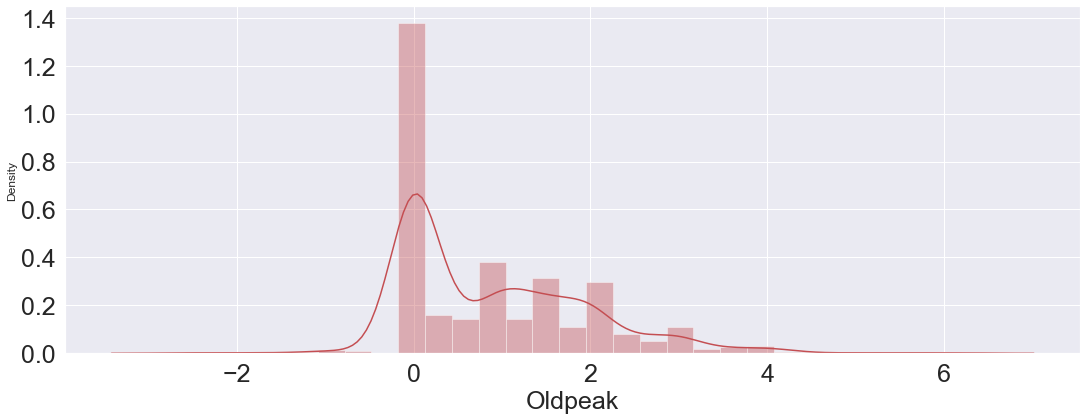

In [32]:
#let find the skewed col and fix them
    
skew_limit=0.75 # limit for skewed col
skew_vals=x_train[numeric_col].drop('FastingBS', axis=1).skew()
skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)

#graphically represent the skewed col
i=1    
print("Columns names: ",skew_col.index)
print("\n")
print("skewed value:--->>",skew_col)
plt.figure(figsize=(40,60))
for col in skew_col.index:
    plt.subplot(8,2,i)
    sns.distplot(X[col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1
        

plt.show()

<b> we got only 1 skewed columns 

In [33]:
#fix the skewness using function transformer
pt=PowerTransformer(standardize=False)
#ft=FunctionTransformer(func=np.log1p)
skew=["Oldpeak"]
x_train[skew]=pt.fit_transform(x_train[skew])
x_test[skew]=pt.transform(x_test[skew])

<b>we transform our Oldpeak col and fix the skewness 😎

In [34]:
x_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
712,58,M,ASY,100,234,0,Normal,156,N,0.096924,Up
477,61,M,ASY,110,0,1,Normal,108,Y,1.340771,Down
409,53,M,NAP,160,0,1,LVH,122,Y,0.000000,Flat
448,63,M,ASY,160,230,1,Normal,105,Y,0.784840,Flat
838,63,M,ASY,130,330,1,LVH,132,Y,1.240498,Up


<a id="7.3"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;"> 🐱‍🏍Encoding the Categorical columns 🧐</p>


In [35]:
#Encoding the categorical columns into numerical columns 
x_train=pd.get_dummies(x_train,columns=categorical_col,drop_first=True) #using pandas function
x_test=pd.get_dummies(x_test,columns=categorical_col,drop_first=True)
print("shape:",x_train.shape)
print()
x_train.head()

shape: (642, 15)



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
712,58,100,234,0,156,0.096924,1,0,0,0,1,0,0,0,1
477,61,110,0,1,108,1.340771,1,0,0,0,1,0,1,0,0
409,53,160,0,1,122,0.000000,1,0,1,0,0,0,1,1,0
448,63,160,230,1,105,0.784840,1,0,0,0,1,0,1,1,0
838,63,130,330,1,132,1.240498,1,0,0,0,0,0,1,0,1


<b> we encode our categorical columns into numerical columns , great !!!!

<a id="7.4"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;"> 🐱‍🏍Scaling the features 🧐</p>


In [36]:
# Using standard scaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns = x_train.columns[:])
x_test = pd.DataFrame(x_test_scaled, columns = x_test.columns[:])
x_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.464714,-1.772314,0.294989,-0.525682,0.774609,-0.698581,0.544949,-0.489267,-0.520852,-0.209529,0.817027,-0.494152,-0.830346,-1.025241,1.158907
1,0.781767,-1.234868,-1.905390,1.902289,-1.173673,1.037494,0.544949,-0.489267,-0.520852,-0.209529,0.817027,-0.494152,1.204318,-1.025241,-0.862882
2,-0.063707,1.452358,-1.905390,1.902289,-0.605424,-0.833861,0.544949,-0.489267,1.919930,-0.209529,-1.223950,-0.494152,1.204318,0.975381,-0.862882
3,0.993136,1.452358,0.257376,1.902289,-1.295440,0.261564,0.544949,-0.489267,-0.520852,-0.209529,0.817027,-0.494152,1.204318,0.975381,-0.862882
4,0.993136,-0.159978,1.197709,1.902289,-0.199532,0.897540,0.544949,-0.489267,-0.520852,-0.209529,-1.223950,-0.494152,1.204318,-1.025241,1.158907


<a id="8"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">🤖 Create & Train Model</p>


In [37]:
#this function used to evalute the models with features and terget.
def models_score(models, X_train, X_test, y_train, y_test):    
    
    scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test) 
        scores[name] = model.score(X_test,y_test)
        #printing the model name and accuracy !!!!!
        print("Model name: ",model)
        print("Accuracy :--->>",accuracy_score(y_test,y_pred))
        print()
        print(classification_report(y_test,y_pred))
        print("Confusion matrix:--->>\n",confusion_matrix(y_test,y_pred)) 
        print("\n<<<<------------------------------------------------------------->>>>\n")
           
   
    model_scores = pd.DataFrame(scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score',ascending=False)
    return model_scores
    
    
   

In [38]:
#initialize the models 
models = {"LogisticRegression":LogisticRegression(solver="liblinear"),
          "SVC":SVC(C= 1.0,gamma= 0.05,kernel='rbf'),
          "DecisionTree":DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='auto',splitter='random'),
          "AdaBoost":AdaBoostClassifier(algorithm='SAMME',learning_rate= 0.1,n_estimators=150),
          "GradiantBoost":GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.05,loss='exponential',n_estimators=100),
         "RandomForest":RandomForestClassifier(criterion='gini',n_estimators=50),
         "XgBoost": XGBClassifier(learning_rate=0.1,n_estimators=50),
         "KNeighborsClassifier":KNeighborsClassifier(n_neighbors=7)}

<a id="9"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">🧮 Models Score</p>

In [39]:
#Calling the function
model_scores = models_score(models, x_train, x_test, y_train, y_test)

Model name:  LogisticRegression(solver='liblinear')
Accuracy :--->> 0.8731884057971014

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276

Confusion matrix:--->>
 [[ 99  13]
 [ 22 142]]

<<<<------------------------------------------------------------->>>>

Model name:  SVC(gamma=0.05)
Accuracy :--->> 0.8876811594202898

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       112
           1       0.91      0.90      0.90       164

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276

Confusion matrix:--->>
 [[ 98  14]
 [ 17 147]]

<<<<----------------------

C:\Users\Asif_Pervez_Polok\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:46:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model name:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy :--->> 0.8514492753623188

              precision    recall  f1-score   support

           0 

In [40]:
model_scores

,Score
GradiantBoost,0.891304
KNeighborsClassifier,0.891304
SVC,0.887681
RandomForest,0.887681
LogisticRegression,0.873188
AdaBoost,0.869565
XgBoost,0.851449
DecisionTree,0.807971


<a id="10"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">📊 Visualize Model Score</p>

In [41]:
model_scores = model_scores.reset_index().rename({"index":"Algorithms"}, axis = 1)

model_scores.style.bar()

,Algorithms,Score
0,GradiantBoost,0.891304
1,KNeighborsClassifier,0.891304
2,SVC,0.887681
3,RandomForest,0.887681
4,LogisticRegression,0.873188
5,AdaBoost,0.869565
6,XgBoost,0.851449
7,DecisionTree,0.807971


In [42]:
fig = px.bar(data_frame = model_scores,
             x="Algorithms",
             y="Score",
             color="Algorithms", title = "<b>Models Score</b>", template = 'plotly_dark')

fig.update_layout(bargap=0.2)

fig.show()

In [43]:
label = model_scores['Algorithms']
value = model_scores['Score']

fig = go.Figure(data=[go.Pie(labels = label, values = value, rotation = 90)])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15)

fig.show()

<a id="11"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;"> 🌈Confusion matrix of top two models</p>

Confusion matrix:------>>>>



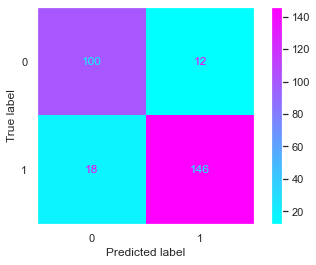

In [44]:
#knn
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
print("Confusion matrix:------>>>>\n")
plot_confusion_matrix(knn,
                      x_test, y_test,
                      cmap="cool",
                      display_labels = ['0', '1'])
plt.grid(False)
plt.show();

Confusion matrix:---------->>>



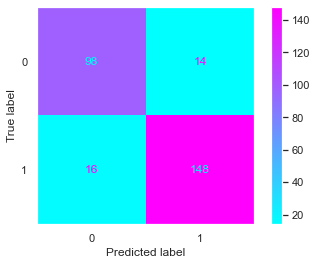

In [45]:
#Gradinat boosting classifier
gbc=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.05,loss='exponential',n_estimators=100)
gbc.fit(x_train,y_train)
print("Confusion matrix:---------->>>\n")
plot_confusion_matrix(gbc,
                      x_test, y_test,
                      cmap="cool",
                      display_labels = ['0', '1'])
plt.grid(False)
plt.show();

<a id="11"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;"> 🌈Thank you 🎃 Happy kaggling👅👅 </p>